In [14]:
import pandas as pd
from konlpy.tag import Okt
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import wordcloud
import re
import seaborn as sns

font_path = "data/THEdog.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

df=pd.read_csv('./output/youtube_view2.csv')


In [15]:
df

,name_list,Kategorie_list,subscriber_list,views_list
0,BLACKPINK,음악,6840만,2358.26만
1,땅콩 Peanut,애니메이션,46.8만,1303.1만
2,SMTOWN,음악,2900만,953.9만
3,BANGTANTV,음악,5960만,846.65만
4,Imagine your Korea,여행/이벤트,46.6만,712.65만
...,...,...,...,...
94,감스트GAMST,엔터테인먼트,209만,157.93만
95,NCT DREAM,음악,411만,157.79만
96,검은별 공작소 B-Star Crafts,기타,12.8만,157.08만
97,오레오 코리아,기타,1.88만,156.21만


In [17]:
df=df.loc[:,['Kategorie_list']]

In [18]:
df

,Kategorie_list
0,음악
1,애니메이션
2,음악
3,음악
4,여행/이벤트
...,...
94,엔터테인먼트
95,음악
96,기타
97,기타


In [19]:
adf=df.apply(pd.value_counts)
adf

,Kategorie_list
음악,20
엔터테인먼트,15
기타,13
애니메이션,9
인물/블로그,7
게임,6
요리,6
먹방,5
스포츠,4
키즈,3


In [20]:
adf.to_csv('./output/project/유튜브장르.csv')

In [25]:
adf

,Kategorie_list
음악,20
엔터테인먼트,15
기타,13
애니메이션,9
인물/블로그,7
게임,6
요리,6
먹방,5
스포츠,4
키즈,3


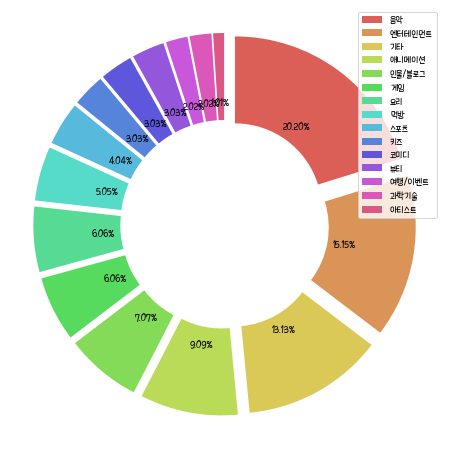

In [27]:
fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성


mycolors=sns.color_palette('hls', 15)

explode=[]
x=0.05
for i in range(len(adf.index)):
    explode.append(0.1)

pie = ax.pie(adf.Kategorie_list,
             startangle=90,
             counterclock=False,
             autopct=lambda p : '{:.2f}%'.format(p),
             colors=mycolors,
             explode=explode,
             wedgeprops=dict(width=0.5),

       )





plt.legend(pie[0],adf.index) ## 범례 표시
plt.show()
#plt.savefig('./output/project/티비쇼세부장르_파이.png')

In [30]:
adf
percent=[]
for i in range(len(adf.index)):
    percent.append((adf.Kategorie_list[i]))


In [31]:
adf

,Kategorie_list
음악,20
엔터테인먼트,15
기타,13
애니메이션,9
인물/블로그,7
게임,6
요리,6
먹방,5
스포츠,4
키즈,3


In [35]:
adf=adf.rename(columns={'Kategorie_list':'cnt'})
adf

,cnt
음악,20
엔터테인먼트,15
기타,13
애니메이션,9
인물/블로그,7
게임,6
요리,6
먹방,5
스포츠,4
키즈,3


In [37]:
#adf
#percent=[]
#for i in range(len(adf.index)):
#    percent.append((adf.Kategorie_list[i]))

    
#adf=adf.rename(columns={0:'cnt'})


cntsum=pd.DataFrame(adf.sum(axis=0))
cntsum=cntsum.rename(columns={0:'a'})
cntsum.a

(adf.cnt[0]/cntsum.a)*100

adf
a=[]
for i in range(len(adf.index)):
    a.append((adf.cnt[i])/cntsum.a*100)

percent=[]
for i in range(len(adf.index)):
    percent.append(round(a[i],2))

percent=pd.DataFrame(percent)
percent=percent.rename(columns={'cnt':'percent'})
percent=percent.reset_index()
percent=percent.percent

percent=pd.DataFrame(percent)
percent.percent

adf1=adf.reset_index()
adf1=pd.concat([adf1,percent],axis=1)
adf1
adf1.set_index('index',inplace=True)

In [39]:
adf1.to_csv('./output/project/퍼센트/유튜브장르퍼센트.csv')